<a href="https://colab.research.google.com/github/binit24/Datascience-projects/blob/main/Brazil_Covid_Dataset_Predictions_EDA_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
f = open("covid19_clinical_dataset.xlsx")

In [5]:
#Reading the Dataset:
df = pd.read_excel('covid19_clinical_dataset.xlsx')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(5644, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
#Checking the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [8]:
#Checking datatypes:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [9]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['Patient ID', 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']


In [10]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print('********************************************')

Patient ID:['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
********************************************
SARS-Cov-2 exam result:['negative' 'positive']
********************************************
Respiratory Syncytial Virus:[nan 'not_detected' 'detected']
********************************************
Influenza A:[nan 'not_detected' 'detected']
********************************************
Influenza B:[nan 'not_detected' 'detected']
********************************************
Parainfluenza 1:[nan 'not_detected' 'detected']
********************************************
CoronavirusNL63:[nan 'not_detected' 'detected']
********************************************
Rhinovirus/Enterovirus:[nan 'detected' 'not_detected']
********************************************
Coronavirus HKU1:[nan 'not_detected' 'detected']
********************************************
Parainfluenza 3:[nan 'not_detected' 'detected']
**************************

                                                    Total Missing Value
Patient ID                                                            0
Patient age quantile                                                  0
SARS-Cov-2 exam result                                                0
Patient addmited to regular ward (1=yes, 0=no)                        0
Patient addmited to semi-intensive unit (1=yes,...                    0
Patient addmited to intensive care unit (1=yes,...                    0
Hematocrit                                                         5041
Hemoglobin                                                         5041
Platelets                                                          5042
Mean platelet volume                                               5045
Red blood Cells                                                    5042
Lymphocytes                                                        5042
Mean corpuscular hemoglobin concentration (MCHC)                

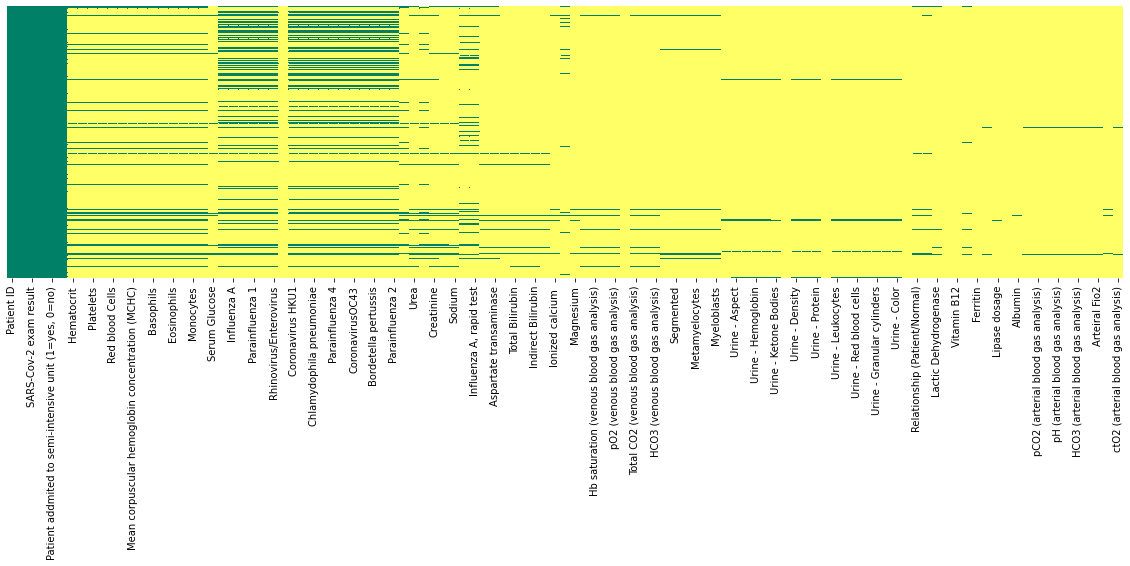

In [13]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [ ]:
#Thers a huge amount of Missing Data present in the Dataset Lets normalize them.

In [14]:
#Checking the columns having Missing value:
col_missing = (df.isnull().sum() == df.shape[0])
col_nan_values = col_missing[col_missing == True].index
print("Columns with all null values:",col_nan_values)

Columns with all null values: Index(['Mycoplasma pneumoniae', 'Urine - Sugar',
       'Partial thromboplastin time (PTT) ', 'Prothrombin time (PT), Activity',
       'D-Dimer'],
      dtype='object')


In [15]:
#Dropping the columns which contains all the null values.
df.drop(col_nan_values, axis=1, inplace=True)

In [19]:
#Again checking for null values in ratio
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(10)

Fio2 (venous blood gas analysis)      0.999823
Urine - Nitrite                       0.999823
Vitamin B12                           0.999468
Lipase dosage                         0.998583
Albumin                               0.997697
Phosphor                              0.996456
Arteiral Fio2                         0.996456
Ferritin                              0.995925
Arterial Lactic Acid                  0.995216
ctO2 (arterial blood gas analysis)    0.995216
dtype: float64

In [20]:
#Lets check the value count of target variable:
print(df['SARS-Cov-2 exam result'].value_counts())
print('*************************************')
print(df['SARS-Cov-2 exam result'].unique())

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64
*************************************
['negative' 'positive']


In [21]:
#Nows lets check the column that dont have null values in it:
col_notnull = (df.isnull().sum() == 0)
col_without_nanvalues = col_notnull[col_notnull == True].index
print("Columns without any null values:",col_without_nanvalues)

Columns without any null values: Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')


In [22]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

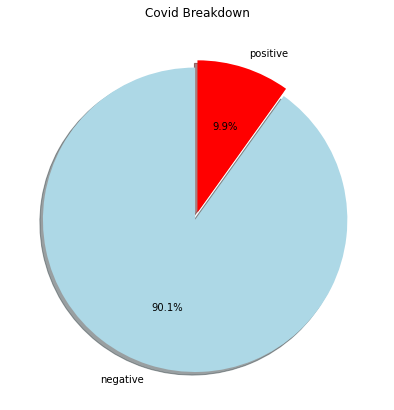

In [23]:
# univariate Analysis: checking customer chrun breakdown:
# Cheking Count of target variable:
from pylab import rcParams
labels = df['SARS-Cov-2 exam result'].value_counts(sort = True).index
sizes = df['SARS-Cov-2 exam result'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)

rcParams['figure.figsize'] = 7,7
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Covid Breakdown')
plt.show()

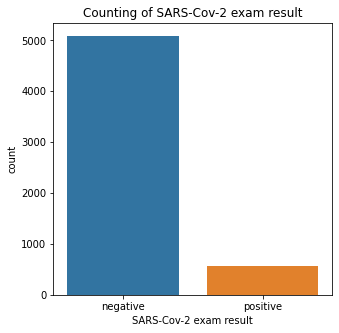

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


In [25]:
#Counting target variable:
plt.figure(figsize=(5,5))
sns.countplot(x='SARS-Cov-2 exam result',data=df)
plt.title("Counting of SARS-Cov-2 exam result")
plt.show()

print(df['SARS-Cov-2 exam result'].value_counts())

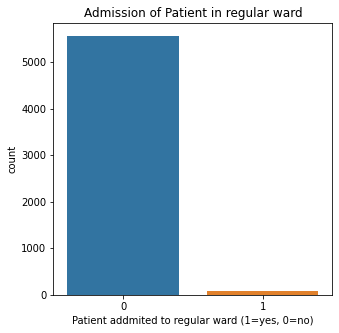

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


In [27]:
#Univariate Analysis:
plt.figure(figsize=(5,5))
sns.countplot(x='Patient addmited to regular ward (1=yes, 0=no)',data=df)
plt.title("Admission of Patient in regular ward")
plt.show()

print(df['SARS-Cov-2 exam result'].value_counts())

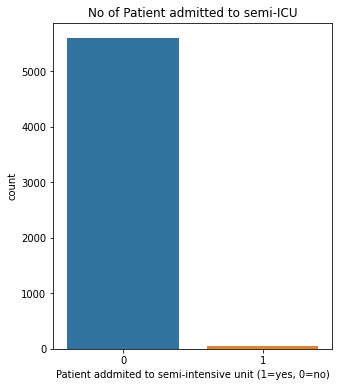

0    5594
1      50
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64


In [30]:
#Univariate Analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Patient addmited to semi-intensive unit (1=yes, 0=no)',data=df)
plt.title("No of Patient admitted to semi-ICU")
plt.show()

print(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'].value_counts())

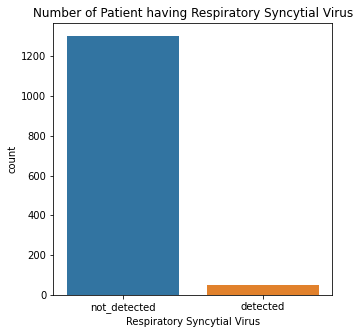

not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64


In [31]:
#Univariate Analysis
plt.figure(figsize=(5,5))
sns.countplot(x='Respiratory Syncytial Virus',data=df)
plt.title("Number of Patient having Respiratory Syncytial Virus")
plt.show()

print(df['Respiratory Syncytial Virus'].value_counts())

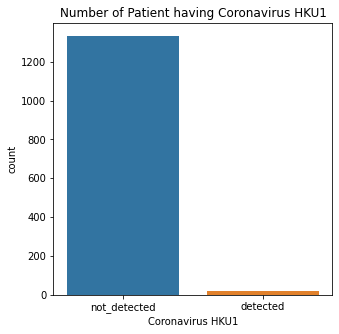

not_detected    1332
detected          20
Name: Coronavirus HKU1, dtype: int64


In [33]:
#univarite Analysis
plt.figure(figsize=(5,5))
sns.countplot(x='Coronavirus HKU1',data=df)
plt.title("Number of Patient having Coronavirus HKU1")
plt.show()

print(df['Coronavirus HKU1'].value_counts())

In [39]:
#Using label encoder to covert catagorical columns into neumerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype==np.number:
      df[column]=le.fit_transform(df[column])